In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Basic setup of ou data

In [2]:
df = pd.read_csv('game_info.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    474417 non-null  int64  
 1   slug                  474415 non-null  object 
 2   name                  474414 non-null  object 
 3   metacritic            4733 non-null    float64
 4   released              450218 non-null  object 
 5   tba                   474417 non-null  bool   
 6   updated               474417 non-null  object 
 7   website               65041 non-null   object 
 8   rating                474417 non-null  float64
 9   rating_top            474417 non-null  int64  
 10  playtime              474417 non-null  int64  
 11  achievements_count    474417 non-null  int64  
 12  ratings_count         474417 non-null  int64  
 13  suggestions_count     474417 non-null  int64  
 14  game_series_count     474417 non-null  int64  
 15  

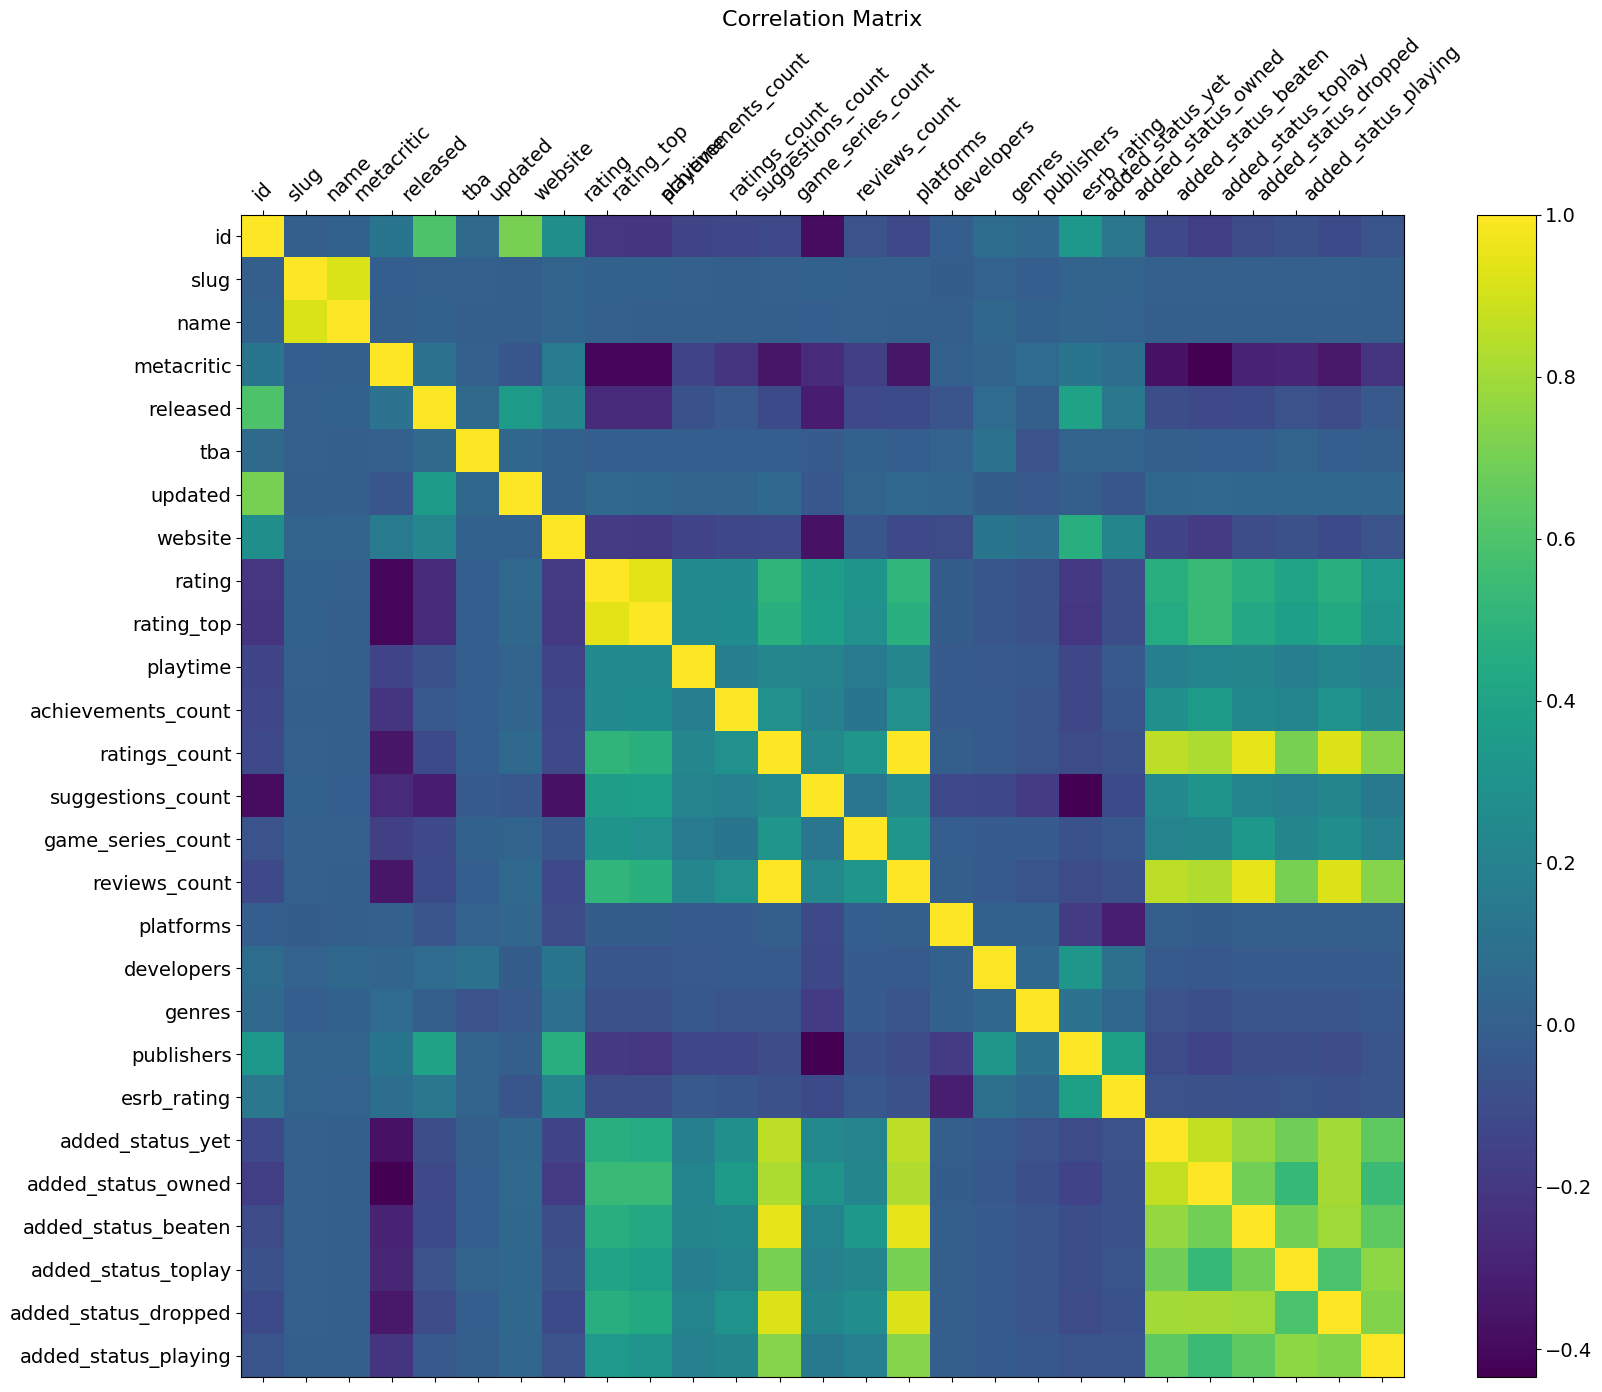

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
corr = df_encoded.corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)

plt.xticks(range(df_encoded.shape[1]), df_encoded.columns, fontsize=14, rotation=45)
plt.yticks(range(df_encoded.shape[1]), df_encoded.columns, fontsize=14)

cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16)

plt.show()


# Try to find correlations

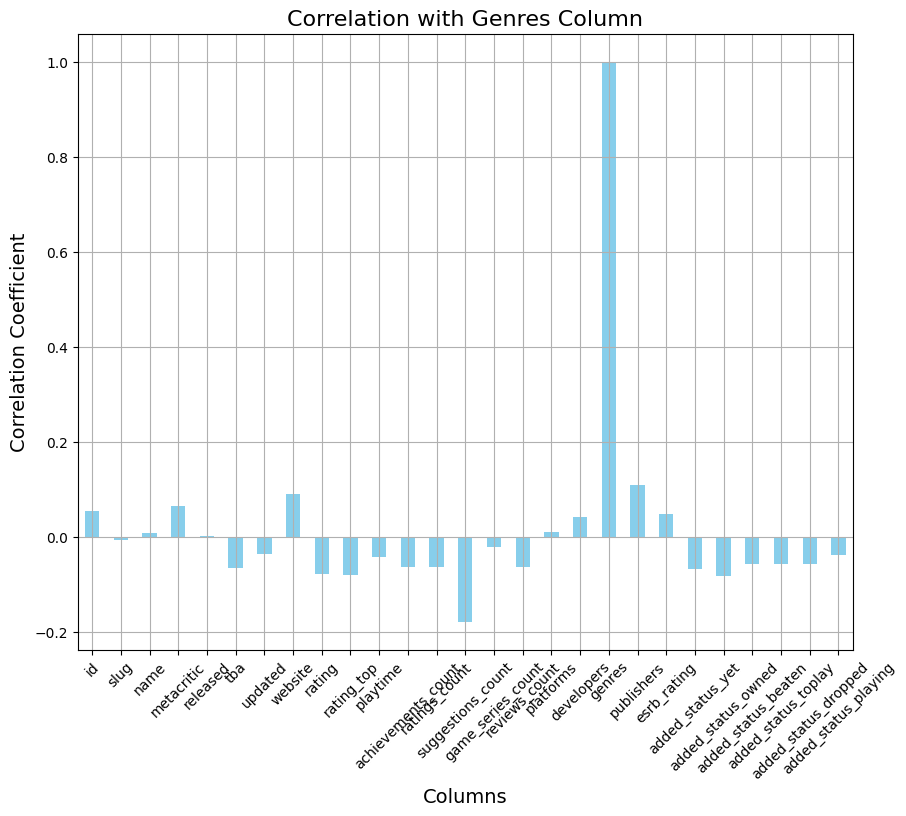

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Compute correlation with 'genres' column
corr = df_encoded.corr()['genres']

# Plotting
plt.figure(figsize=(10, 8))
corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with Genres Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Filtering out anything where therer are no genres which will be our classes

In [5]:
print("length of our data: " + str(len(df)))
filtered_df  = df.dropna(subset=['genres'])
print("length of our data after droping empty genres: " + str(len(filtered_df)))

length of our data: 474417
length of our data after droping empty genres: 371232


# Count and separate the number of genres


In [6]:
filtered_df['genre_list'] = filtered_df.genres.apply(lambda x: x[:].split('||'))
filtered_df.head(10)

C:\Users\gydan\AppData\Local\Temp\ipykernel_25456\2300409244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genre_list'] = filtered_df.genres.apply(lambda x: x[:].split('||'))


,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genre_list
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0,"[Adventure, Puzzle]"
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,...,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0,"[Simulation, Indie]"
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0,"[Adventure, Arcade]"
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0,"[Action, Indie]"
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,...,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0,"[RPG, Strategy, Massively Multiplayer]"
6,100001,the-moon-sliver-itch,The Moon Sliver (itch),NaN,2014-05-03,False,2019-01-09T12:41:06,NaN,0.0,0,...,Adventure,NaN,NaN,0,0,0,0,0,0,[Adventure]
7,100002,red-entity,Red Entity,NaN,2014-08-26,False,2019-01-09T12:41:06,NaN,0.0,0,...,Action||Shooter,NaN,NaN,0,0,0,0,0,0,"[Action, Shooter]"
8,100004,hippiesvscops,HippiesVsCops,NaN,2016-04-18,False,2019-08-28T23:25:11,NaN,0.0,0,...,Strategy,NaN,NaN,0,0,0,0,0,0,[Strategy]
9,100005,they-came-through-the-floor,They Came Through the Floor,NaN,2018-06-24,False,2019-01-09T12:41:06,NaN,0.0,0,...,Platformer,NaN,NaN,0,0,0,0,0,0,[Platformer]
10,100006,fading-light-descent,Fading Light: Descent,NaN,2017-08-24,False,2019-01-09T12:41:06,NaN,0.0,0,...,Adventure,NaN,NaN,0,1,0,0,0,0,[Adventure]


In [7]:
exploded_df = filtered_df.explode('genre_list')

unique_genre_count = exploded_df['genre_list'].nunique()

print(exploded_df['genre_list'].unique())
print(f"Number of unique genres: {unique_genre_count}")

['Adventure' 'Puzzle' 'Simulation' 'Indie' 'Arcade' 'Action' 'RPG'
 'Strategy' 'Massively Multiplayer' 'Shooter' 'Platformer' 'Educational'
 'Casual' 'Racing' 'Sports' 'Fighting' 'Family' 'Board Games' 'Card']
Number of unique genres: 19


# Combine metacritic and rating into one value and clear out where neither exist


In [8]:
filtered_df = filtered_df.dropna(subset=['rating', 'metacritic'], how='all')
filtered_df['rating'].fillna(-1, inplace=True)
filtered_df['metacritic'].fillna(-1, inplace=True)

# Transform the scales to a common range
filtered_df['rating'] = filtered_df['rating'].apply(lambda x: (x - 1) * 2 if x >= 0 else x)
filtered_df['metacritic'] = filtered_df['metacritic'].apply(lambda x: x / 10 if x >= 0 else x)

# Calculate the average rating
filtered_df['avg_rating'] = (filtered_df['rating'] + filtered_df['metacritic']) / 2

# Clip the result to be between 0 and 10
filtered_df['avg_rating'] = np.clip(filtered_df['avg_rating'], 0, 10)
filtered_df = filtered_df[filtered_df['avg_rating'] != 0.0]
print(len(filtered_df))

12141


# Drop unecessary values

In [9]:
percent_missing = filtered_df.isna().sum() * 100 / len(filtered_df)
percent_missing

id                       0.000000
slug                     0.000000
name                     0.000000
metacritic               0.000000
released                 1.400214
tba                      0.000000
updated                  0.000000
website                 33.423935
rating                   0.000000
rating_top               0.000000
playtime                 0.000000
achievements_count       0.000000
ratings_count            0.000000
suggestions_count        0.000000
game_series_count        0.000000
reviews_count            0.000000
platforms                0.041183
developers               1.877934
genres                   0.000000
publishers               3.632320
esrb_rating             60.332757
added_status_yet         0.000000
added_status_owned       0.000000
added_status_beaten      0.000000
added_status_toplay      0.000000
added_status_dropped     0.000000
added_status_playing     0.000000
genre_list               0.000000
avg_rating               0.000000
dtype: float64

In [10]:
filtered_df=filtered_df.drop(columns='esrb_rating') # Too many missing values has to be dropped otherwise it could highly disturb the dataset
filtered_df=filtered_df.drop(columns='website') # string unecessary
filtered_df=filtered_df.drop(columns='id') # string unecessary
filtered_df=filtered_df.drop(columns='tba') # string unecessary
filtered_df=filtered_df.drop(columns='slug') # string unecessary
filtered_df=filtered_df.drop(columns='genres') # these will be our labels they shouldn't also be in the training data
filtered_df=filtered_df.drop(columns='metacritic') # we have created a new combined rating from both rrating and metacritic
filtered_df=filtered_df.drop(columns='rating')# we have created a new combined rating from both rrating and metacritic
df_cleaned = filtered_df.dropna()
df_cleaned['publisher_list'] = df_cleaned.publishers.apply(lambda x: x.split('||')[0])
df_cleaned['platform_list'] = df_cleaned.platforms.apply(lambda x: x.split('||'))
df_cleaned['developer_list'] = df_cleaned.developers.apply(lambda x: x.split('||')[0])
df_cleaned=df_cleaned.drop(columns='publishers')
df_cleaned=df_cleaned.drop(columns='platforms')
df_cleaned=df_cleaned.drop(columns='developers')


C:\Users\gydan\AppData\Local\Temp\ipykernel_25456\3011476560.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['publisher_list'] = df_cleaned.publishers.apply(lambda x: x.split('||')[0])
C:\Users\gydan\AppData\Local\Temp\ipykernel_25456\3011476560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['platform_list'] = df_cleaned.platforms.apply(lambda x: x.split('||'))
C:\Users\gydan\AppData\Local\Temp\ipykernel_25456\3011476560.py:12: SettingWithCopyWarning: 
A value is trying to b

In [11]:
percent_missing = df_cleaned.isna().sum() * 100 / len(df_cleaned)
percent_missing

name                    0.0
released                0.0
updated                 0.0
rating_top              0.0
playtime                0.0
achievements_count      0.0
ratings_count           0.0
suggestions_count       0.0
game_series_count       0.0
reviews_count           0.0
added_status_yet        0.0
added_status_owned      0.0
added_status_beaten     0.0
added_status_toplay     0.0
added_status_dropped    0.0
added_status_playing    0.0
genre_list              0.0
avg_rating              0.0
publisher_list          0.0
platform_list           0.0
developer_list          0.0
dtype: float64

In [12]:
print(len(df_cleaned))
df_cleaned.head(5)


11376


,name,released,updated,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,...,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genre_list,avg_rating,publisher_list,platform_list,developer_list
13,Serious Sam Fusion 2017 (beta),2017-03-20,2020-03-08T19:03:42,4,1,76,227,541,19,227,...,3292,41,11,79,2,"[Action, Indie]",1.57,Devolver Digital,"[Linux, macOS, PC]",Croteam
23,Life is Feudal: Forest Village,2016-08-26,2019-09-17T10:28:05,4,3,29,18,596,0,19,...,150,7,10,5,4,"[Strategy, Simulation, Indie]",2.24,Bitbox,[PC],Mindillusion
43,Mages of Mystralia,2017-05-17,2019-09-17T12:12:38,5,3,104,16,438,0,16,...,564,10,9,3,2,"[Action, Adventure, Indie]",6.00,Borealys Games,"[PC, Xbox One, PlayStation 4, Nintendo Switch]",Borealys Games
53,SEUM: Speedrunners from Hell,2016-07-27,2020-10-02T02:35:30,4,4,57,34,514,0,34,...,399,9,3,9,2,"[Action, Shooter, Adventure, Arcade, Indie]",2.24,Headup Games,"[macOS, PC, Linux, PlayStation 4, Xbox One]",Headup Games
85,Sudden Strike 4,2017-08-10,2019-10-22T14:21:49,4,2,121,32,546,4,33,...,603,3,6,13,4,"[Action, Strategy]",5.97,Kalypso Media,"[macOS, iOS, Linux, PC, PlayStation 4]",Kalypso Media


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11376 entries, 13 to 474398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  11376 non-null  object 
 1   released              11376 non-null  object 
 2   updated               11376 non-null  object 
 3   rating_top            11376 non-null  int64  
 4   playtime              11376 non-null  int64  
 5   achievements_count    11376 non-null  int64  
 6   ratings_count         11376 non-null  int64  
 7   suggestions_count     11376 non-null  int64  
 8   game_series_count     11376 non-null  int64  
 9   reviews_count         11376 non-null  int64  
 10  added_status_yet      11376 non-null  int64  
 11  added_status_owned    11376 non-null  int64  
 12  added_status_beaten   11376 non-null  int64  
 13  added_status_toplay   11376 non-null  int64  
 14  added_status_dropped  11376 non-null  int64  
 15  added_status_playing  

# cast time into a more managable format

In [14]:
df_cleaned['released'] = pd.to_datetime(df_cleaned['released']).astype(np.int64)
df_cleaned['updated'] = pd.to_datetime(df_cleaned['updated']).astype(np.int64)

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11376 entries, 13 to 474398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  11376 non-null  object 
 1   released              11376 non-null  int64  
 2   updated               11376 non-null  int64  
 3   rating_top            11376 non-null  int64  
 4   playtime              11376 non-null  int64  
 5   achievements_count    11376 non-null  int64  
 6   ratings_count         11376 non-null  int64  
 7   suggestions_count     11376 non-null  int64  
 8   game_series_count     11376 non-null  int64  
 9   reviews_count         11376 non-null  int64  
 10  added_status_yet      11376 non-null  int64  
 11  added_status_owned    11376 non-null  int64  
 12  added_status_beaten   11376 non-null  int64  
 13  added_status_toplay   11376 non-null  int64  
 14  added_status_dropped  11376 non-null  int64  
 15  added_status_playing  

# One hot encode genre and platfom list since they are relativly small in number


In [16]:
exploded_genre_df = df_cleaned.explode('genre_list')
unique_genre_count = exploded_genre_df['genre_list'].nunique()

exploded_platform_df = df_cleaned.explode('platform_list')
unique_platform_count = exploded_platform_df['platform_list'].nunique()


print(exploded_genre_df['genre_list'].unique())
print(f"Number of unique genres: {unique_genre_count}")

print(exploded_platform_df['platform_list'].unique())
print(f"Number of unique platform: {unique_platform_count}")
"""

exploded_publisher_df = df_cleaned.explode('publisher_list')
unique_publisher_count = exploded_publisher_df['publisher_list'].nunique()

exploded_developer_df = df_cleaned.explode('developer_list')
unique_developer_count = exploded_developer_df['developer_list'].nunique()


print(exploded_publisher_df['publisher_list'].unique())
print(f"Number of unique publiser: {unique_publisher_count}")

print(exploded_developer_df['developer_list'].unique())
print(f"Number of unique developer: {unique_developer_count}")
"""

['Action' 'Indie' 'Strategy' 'Simulation' 'Adventure' 'Shooter' 'Arcade'
 'Sports' 'Racing' 'RPG' 'Massively Multiplayer' 'Casual' 'Puzzle'
 'Platformer' 'Board Games' 'Card' 'Educational' 'Fighting' 'Family']
Number of unique genres: 19
['Linux' 'macOS' 'PC' 'Xbox One' 'PlayStation 4' 'Nintendo Switch' 'iOS'
 'Nintendo 3DS' 'Xbox 360' 'PlayStation 3' 'Android' 'PlayStation 2'
 'Xbox' 'Wii' 'PS Vita' 'Game Boy Advance' 'Classic Macintosh' 'Wii U'
 'Nintendo 64' 'Game Boy' 'Web' 'SNES' 'PlayStation' 'PSP' 'Nintendo DS'
 'GameCube' 'Dreamcast' 'Commodore / Amiga' '3DO' 'Game Gear' 'Genesis'
 'Neo Geo' 'SEGA Master System' 'SEGA CD' 'Atari ST' 'Game Boy Color'
 'Nintendo DSi' 'NES' 'SEGA Saturn' 'Apple II' 'Jaguar' 'Atari 8-bit'
 'Atari 2600' 'Atari 5200' 'Xbox Series S/X' 'PlayStation 5' 'SEGA 32X'
 'Atari 7800' 'Atari Lynx' 'Atari XEGS' 'Atari Flashback']
Number of unique platform: 51


'\n\nexploded_publisher_df = df_cleaned.explode(\'publisher_list\')\nunique_publisher_count = exploded_publisher_df[\'publisher_list\'].nunique()\n\nexploded_developer_df = df_cleaned.explode(\'developer_list\')\nunique_developer_count = exploded_developer_df[\'developer_list\'].nunique()\n\n\nprint(exploded_publisher_df[\'publisher_list\'].unique())\nprint(f"Number of unique publiser: {unique_publisher_count}")\n\nprint(exploded_developer_df[\'developer_list\'].unique())\nprint(f"Number of unique developer: {unique_developer_count}")\n'

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres = pd.DataFrame(mlb.fit_transform(df_cleaned['genre_list']),columns=mlb.classes_, index=df_cleaned.index)
df_cleaned=df_cleaned.drop(columns='genre_list')

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
platforms = pd.DataFrame(mlb.fit_transform(df_cleaned['platform_list']),columns=mlb.classes_, index=df_cleaned.index)
platforms.head(5)
df_cleaned=df_cleaned.drop(columns='platform_list')


# Encode studios and publisher

In [19]:
from sklearn.preprocessing import LabelEncoder
le_pub = LabelEncoder()
df_cleaned['publisher_list']=le_pub.fit_transform(df_cleaned['publisher_list'])

le_dev = LabelEncoder()
df_cleaned['developer_list']=le_dev.fit_transform(df_cleaned['developer_list'])

# Normalize

In [20]:
df_cleaned_norm=df_cleaned;
#df_cleaned_norm=df_cleaned_norm.drop(columns='released');
df_cleaned_norm=df_cleaned_norm.drop(columns='name');
df_cleaned_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11376 entries, 13 to 474398
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   released              11376 non-null  int64  
 1   updated               11376 non-null  int64  
 2   rating_top            11376 non-null  int64  
 3   playtime              11376 non-null  int64  
 4   achievements_count    11376 non-null  int64  
 5   ratings_count         11376 non-null  int64  
 6   suggestions_count     11376 non-null  int64  
 7   game_series_count     11376 non-null  int64  
 8   reviews_count         11376 non-null  int64  
 9   added_status_yet      11376 non-null  int64  
 10  added_status_owned    11376 non-null  int64  
 11  added_status_beaten   11376 non-null  int64  
 12  added_status_toplay   11376 non-null  int64  
 13  added_status_dropped  11376 non-null  int64  
 14  added_status_playing  11376 non-null  int64  
 15  avg_rating            

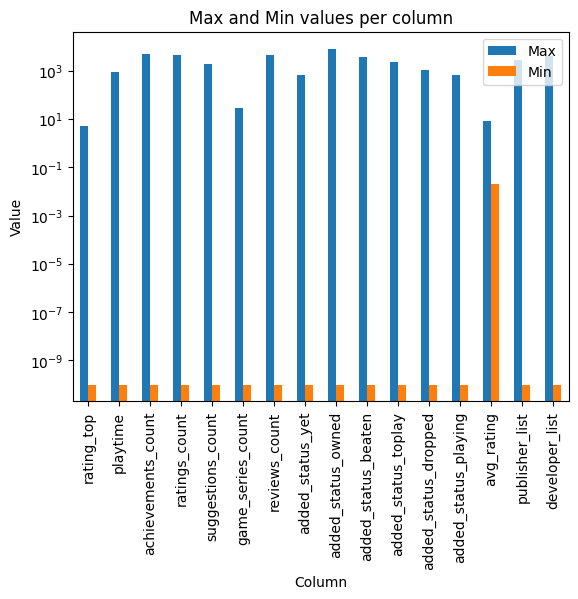

In [21]:
import matplotlib.pyplot as plt
import numpy as np

max_values = df_cleaned_norm.drop(columns=['released','updated']).max() # otherwise the erleased would be the only value observable
min_values = df_cleaned_norm.drop(columns=['released','updated']).min()

min_values += 1e-10 # so that we can see it even if it's zero

df_viz = pd.DataFrame({'Max': max_values, 'Min': min_values})

df_viz.plot(kind='bar')

plt.title('Max and Min values per column')
plt.xlabel('Column')
# min values can bee seen 
plt.yscale('log')
plt.ylabel('Value')

plt.show()


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_cleaned_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned_norm), columns=df_cleaned_norm.columns, index=df_cleaned_norm.index)


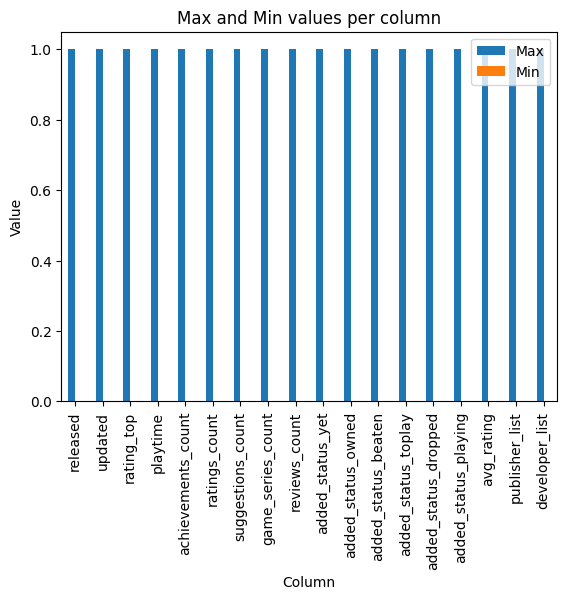

In [23]:
#Calculate the maximum and minimum of each column
max_values = df_cleaned_scaled.max()
min_values = df_cleaned_scaled.min()
min_values += 1e-10 # so that we can see it even if it's zero
# Create a new DataFrame for the visualization
df_viz = pd.DataFrame({'Max': max_values, 'Min': min_values})

# Plot the DataFrame
df_viz.plot(kind='bar')

# Set the title and labels
plt.title('Max and Min values per column')
plt.xlabel('Column')
plt.ylabel('Value')

# Show the plot
plt.show()

In [24]:
df_cleaned_scaled.head(10)

,released,updated,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,avg_rating,publisher_list,developer_list
13,0.906211,0.594670,0.8,0.001111,0.014902,0.052926,0.294182,0.678571,0.052377,0.314961,0.396722,0.011605,0.004731,0.072344,0.003106,0.181499,0.216820,0.197581
23,0.895152,0.351684,0.8,0.003333,0.005686,0.004197,0.324089,0.000000,0.004384,0.012598,0.018077,0.001981,0.004301,0.004579,0.006211,0.259953,0.113201,0.544118
43,0.909325,0.351785,1.0,0.003333,0.020392,0.003730,0.238173,0.000000,0.003692,0.050394,0.067968,0.002830,0.003871,0.002747,0.003106,0.700234,0.127395,0.132590
53,0.893542,0.885251,0.8,0.004444,0.011176,0.007927,0.279500,0.000000,0.007845,0.048819,0.048084,0.002547,0.001290,0.008242,0.003106,0.259953,0.379347,0.379981
85,0.913888,0.400969,0.8,0.002222,0.023725,0.007461,0.296900,0.142857,0.007614,0.100787,0.072668,0.000849,0.002581,0.011905,0.006211,0.696721,0.451384,0.453985
135,0.909969,0.414139,0.6,0.003333,0.021373,0.004197,0.308320,0.000000,0.004153,0.006299,0.012051,0.000566,0.000430,0.005495,0.000000,0.147541,0.544003,0.542220
155,0.875772,0.351484,0.6,0.001111,0.009608,0.004896,0.266993,0.000000,0.004845,0.007874,0.038081,0.000000,0.000860,0.010073,0.000000,0.112412,0.799858,0.802419
166,0.853707,0.528458,0.6,0.001111,0.010784,0.008627,0.353453,0.000000,0.008537,0.028346,0.050012,0.001698,0.000430,0.016484,0.001553,0.119438,0.818311,0.819734
207,0.900628,0.749044,0.8,0.003333,0.017059,0.009792,0.328983,0.000000,0.009691,0.020472,0.035430,0.006510,0.003441,0.015568,0.003106,0.795082,0.914478,0.915560
238,0.908251,0.351292,0.2,0.003333,0.007843,0.032408,0.206634,0.000000,0.032072,0.179528,0.211376,0.000566,0.000430,0.023810,0.001553,0.079625,0.589070,0.588947


# Correlation

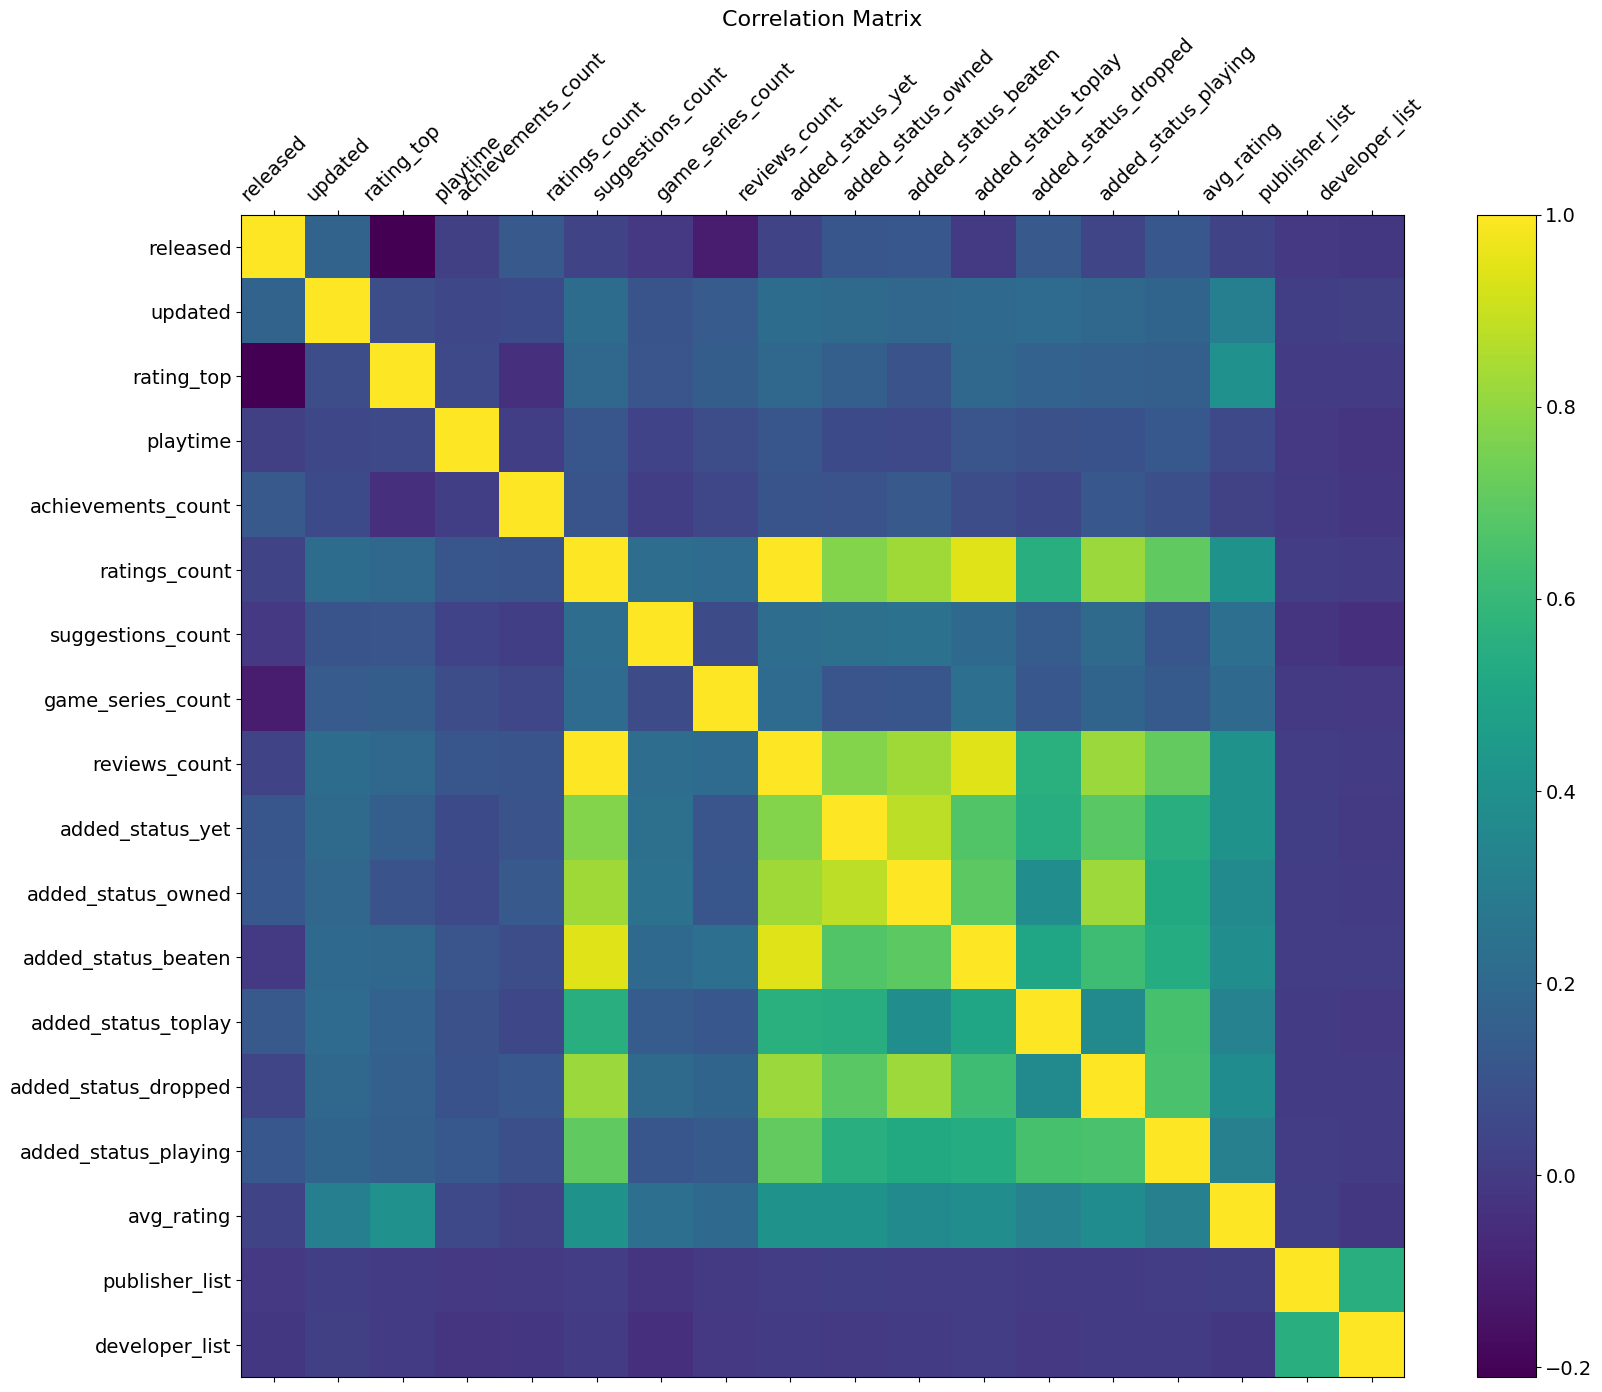

In [25]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_cleaned_scaled.corr(), fignum=f.number)
plt.xticks(range(df_cleaned_scaled.shape[1]), df_cleaned_scaled.columns, fontsize=14,rotation=45)
plt.yticks(range(df_cleaned_scaled.shape[1]), df_cleaned_scaled.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Append one hot encoded back to table


In [26]:
df_cleaned_scaled_without_platforms = df_cleaned_scaled
df_cleaned_scaled = pd.concat([df_cleaned_scaled, platforms],axis='columns', sort=False)

In [27]:
df_cleaned_scaled.head(5)

,released,updated,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,added_status_yet,...,SNES,Web,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series S/X,iOS,macOS
13,0.906211,0.594670,0.8,0.001111,0.014902,0.052926,0.294182,0.678571,0.052377,0.314961,...,0,0,0,0,0,0,0,0,0,1
23,0.895152,0.351684,0.8,0.003333,0.005686,0.004197,0.324089,0.000000,0.004384,0.012598,...,0,0,0,0,0,0,0,0,0,0
43,0.909325,0.351785,1.0,0.003333,0.020392,0.003730,0.238173,0.000000,0.003692,0.050394,...,0,0,0,0,0,0,1,0,0,0
53,0.893542,0.885251,0.8,0.004444,0.011176,0.007927,0.279500,0.000000,0.007845,0.048819,...,0,0,0,0,0,0,1,0,0,1
85,0.913888,0.400969,0.8,0.002222,0.023725,0.007461,0.296900,0.142857,0.007614,0.100787,...,0,0,0,0,0,0,0,0,1,1


In [28]:
df_cleaned_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11376 entries, 13 to 474398
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   released              11376 non-null  float64
 1   updated               11376 non-null  float64
 2   rating_top            11376 non-null  float64
 3   playtime              11376 non-null  float64
 4   achievements_count    11376 non-null  float64
 5   ratings_count         11376 non-null  float64
 6   suggestions_count     11376 non-null  float64
 7   game_series_count     11376 non-null  float64
 8   reviews_count         11376 non-null  float64
 9   added_status_yet      11376 non-null  float64
 10  added_status_owned    11376 non-null  float64
 11  added_status_beaten   11376 non-null  float64
 12  added_status_toplay   11376 non-null  float64
 13  added_status_dropped  11376 non-null  float64
 14  added_status_playing  11376 non-null  float64
 15  avg_rating            

# Correlation

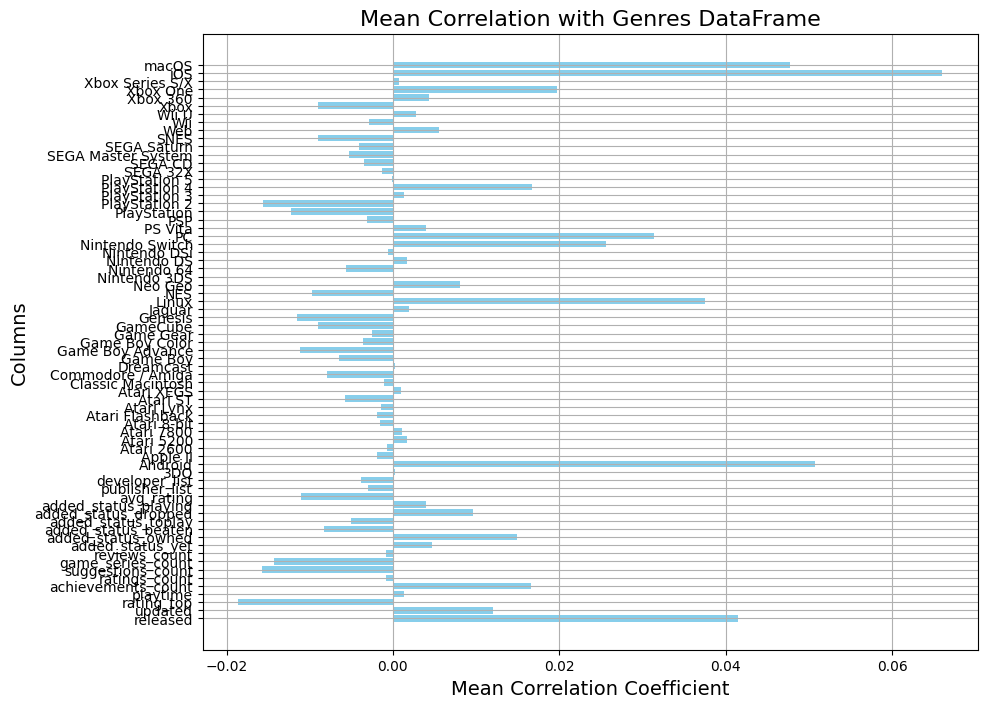

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Concatenate the dataframes
df_corr = pd.concat([df_cleaned_scaled, genres], axis='columns', sort=False)

# Compute correlation with each column in df_cleaned_scaled
correlations = {}
for col in df_cleaned_scaled.columns:
    correlations[col] = df_corr[[col]+list(genres.columns)].corr()[col].iloc[1:].mean()

# Convert the dictionary to a DataFrame
corr_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Mean Correlation'])

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(corr_df['Column'], corr_df['Mean Correlation'], color='skyblue')
plt.title('Mean Correlation with Genres DataFrame', fontsize=16)
plt.xlabel('Mean Correlation Coefficient', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.grid(True)
plt.show()


# Train model

In [30]:
from sklearn.model_selection import train_test_split
X = df_cleaned_scaled
y = genres
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#hidden_layer_sizes=(150,100,50,25,10,5), max_iter=300,activation = 'relu',solver='adam',random_state=1

model= MLPClassifier()
model.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model.predict(X_test)


cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

print(metrics.classification_report(expected_y, predicted_y))
print(cm)

Accuracy of MLPClassifier :  0.47363796133567665
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      1101
           1       0.61      0.34      0.43       775
           2       0.55      0.12      0.20       226
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        14
           5       0.55      0.21      0.31       317
           6       0.00      0.00      0.00        15
           7       0.25      0.02      0.04        41
           8       0.62      0.06      0.11        80
           9       0.77      0.83      0.80       813
          10       0.50      0.08      0.14        61
          11       0.33      0.06      0.11       112
          12       0.38      0.06      0.10       149
          13       0.45      0.07      0.12       437
          14       0.40      0.01      0.03       136
          15       0.56      0.18      0.27       207
          16       0.55      0.0

c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# plot accuracy

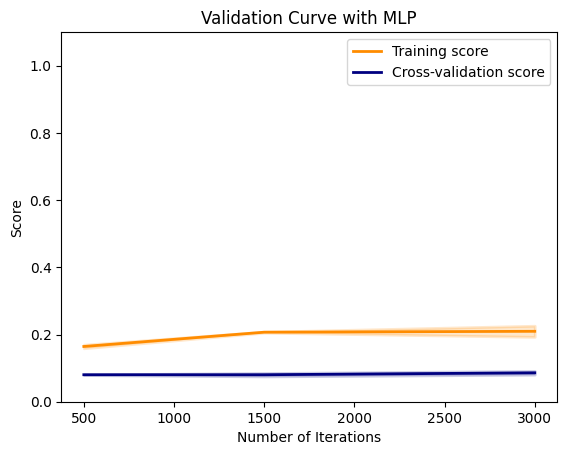

In [36]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np



# Define the parameter range (this could be any hyperparameter, not only 'max_iter')
param_range = [500,1500,3000]

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="max_iter", param_range=param_range,
    cv=2, scoring="accuracy", n_jobs=-1)

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.title("Validation Curve with MLP")
plt.xlabel("Number of Iterations")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")


MAE: 0.1023


In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")


MSE: 0.1023


In [39]:
r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score:.4f}")


R-squared: 0.0817


In [40]:
print(model.predict(X_test[:]))
print(y_test[:10])

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
        Action  Adventure  Arcade  Board Games  Card  Casual  Educational  \
5721         0          1       0            0     0       1            0   
205288       0          0       0            0     0       0            0   
230992       1          1       0            0     0       0            0   
184074       1          1       0            0     0       0            0   
468578       0          0       0            0     0       1            0   
55830        1          1       0            0     0       1            0   
428057       1          0       0            0     0       0            0   
290841       0          1       0            0     0       0            0   
406742       1          0       0            0     0       0            0   
297365       1          0       0            0     0       0            0   

        Family  Fighting  Indie 

# Try to optimize hyper parameters

## Gridseach


### Try increasing iteration

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('mlp', MLPClassifier())])

params = [{'mlp__alpha': [0.0001,0.001,0.005, 0.05],
           'mlp__max_iter':[500,750,1500,3000,4000,5000,7200],
           }]

gs_mlp = GridSearchCV(mlp_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5)

gs_mlp.fit(X_train, y_train)

print(gs_mlp.best_params_)

# find best model score
print(gs_mlp.score(X_train, y_train))

{'mlp__alpha': 0.001, 'mlp__max_iter': 3000}
0.16791208791208792


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('mlp', MLPClassifier())])

params = [{#'mlp__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
           'mlp__activation': ['tanh', 'relu'],
           'mlp__solver': ['sgd', 'adam'],
           #'mlp__alpha': [0.0001,0.001,0.005, 0.05],
           'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],
           }]

gs_mlp = GridSearchCV(mlp_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5)

gs_mlp.fit(X_train, y_train)

print(gs_mlp.best_params_)

# find best model score
print(gs_mlp.score(X_train, y_train))

{'mlp__activation': 'relu', 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'adam'}
0.10824175824175825


c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('mlp', MLPClassifier())])

params = [{'mlp__hidden_layer_sizes': [(50,50,50,20), (50,100,50), (100,)],
           'mlp__alpha': [0.0001,0.001,0.005, 0.05],
           }]

gs_mlp = GridSearchCV(mlp_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5)

gs_mlp.fit(X_train, y_train)

print(gs_mlp.best_params_)

# find best model score
print(gs_mlp.score(X_train, y_train))

{'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50, 100, 50)}
0.15516483516483517


c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Randomized search cv

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np

def hyperparameter_tune(clf, parameters, iterations, X, y):
  randomSearch = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1, n_iter=iterations, cv=2) 
  randomSearch.fit(X,y)
  params = randomSearch.best_params_
  score = randomSearch.best_score_
  return params, score


params = {'hidden_layer_sizes': [(50),(50,50,50), (50,100,50), (100,),(500,50,),(1000,100,10,18),(150,50,150,50,20),(30,30,30,30,30),(30,30,30,)],
           'activation': ['tanh', 'relu','logistic','identity'],
           'solver': ['sgd', 'adam'],
           'alpha': [0.0001,0.001,0.005, 0.05,0.1,0.5,0.8],
           'learning_rate': ['invscaling', 'adaptive'],
           'max_iter':[50,200,500,1000,2000,5000,10000,20000,40000],
           }

clf = MLPClassifier(verbose=True, early_stopping=True)


parameters_after_tuning, score_after_tuning = hyperparameter_tune(clf, params, 10, X_train, y_train);
print("parameters after tunning:")
print(parameters_after_tuning)
print("scores after tunning:")
print(score_after_tuning)

Iteration 1, loss = 8.73506707
Validation score: 0.029670
Iteration 2, loss = 5.67874335
Validation score: 0.025275
Iteration 3, loss = 5.39601370
Validation score: 0.030769
Iteration 4, loss = 5.25465822
Validation score: 0.036264
Iteration 5, loss = 5.19078786
Validation score: 0.038462
Iteration 6, loss = 5.14144498
Validation score: 0.031868
Iteration 7, loss = 5.10338334
Validation score: 0.054945
Iteration 8, loss = 5.07018469
Validation score: 0.057143
Iteration 9, loss = 5.03735797
Validation score: 0.060440
Iteration 10, loss = 5.01352961
Validation score: 0.043956
Iteration 11, loss = 4.98530352
Validation score: 0.067033
Iteration 12, loss = 4.95955158
Validation score: 0.043956
Iteration 13, loss = 4.94513620
Validation score: 0.060440
Iteration 14, loss = 4.92196510
Validation score: 0.065934
Iteration 15, loss = 4.90739918
Validation score: 0.053846
Iteration 16, loss = 4.88796738
Validation score: 0.062637
Iteration 17, loss = 4.87353240
Validation score: 0.069231
Iterat

In [45]:
print(genres.sum())

Action                   5642
Adventure                3730
Arcade                   1088
Board Games                95
Card                       72
Casual                   1625
Educational                73
Family                    193
Fighting                  403
Indie                    3974
Massively Multiplayer     338
Platformer                551
Puzzle                    757
RPG                      2304
Racing                    686
Shooter                  1096
Simulation               1454
Sports                    672
Strategy                 2106
dtype: int64


# Test classifiers

Accuracy of Nearest Neighbors :  0.437609841827768


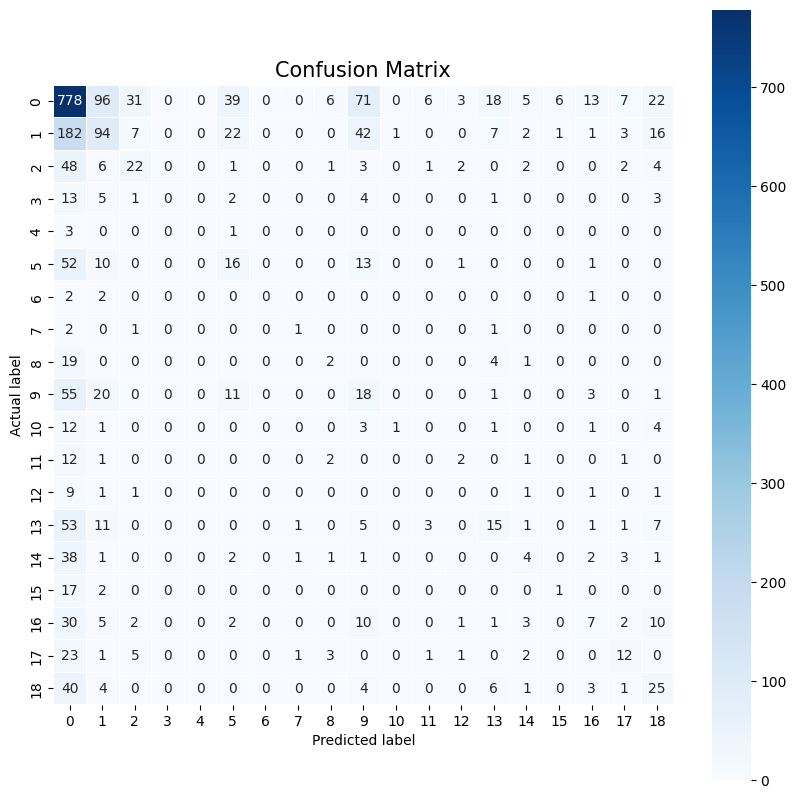

Nearest Neighbors clf score : 0.1023725834797891
Accuracy of Decision Tree :  0.45123022847100175


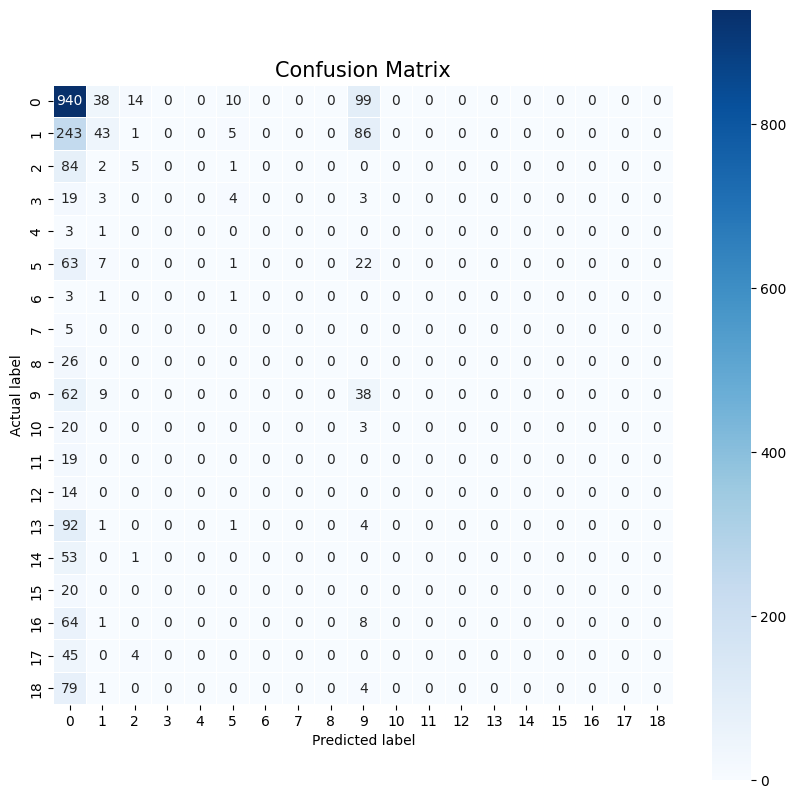

Decision Tree clf score : 0.04437609841827768
Accuracy of Random Forest :  0.4780316344463972


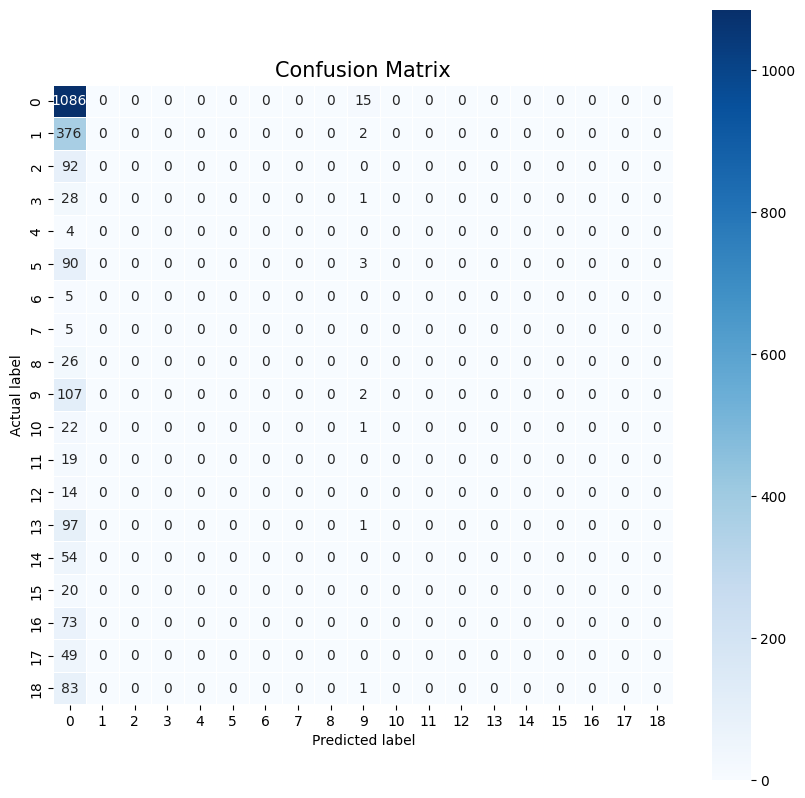

Random Forest clf score : 0.023725834797891036
Accuracy of Neural Net :  0.4710017574692443


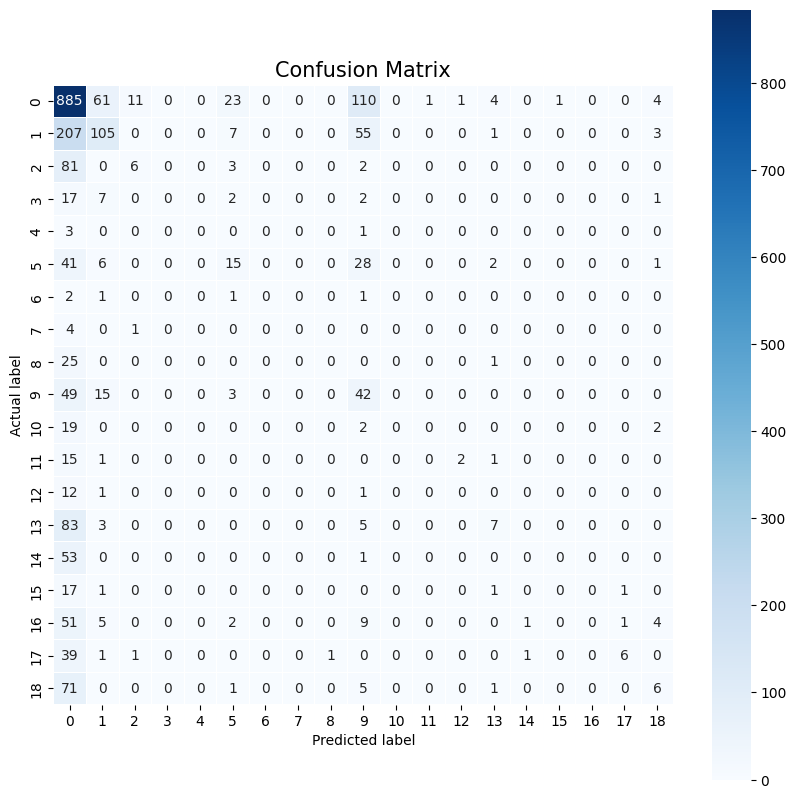

Neural Net clf score : 0.08567662565905097


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
]

X = df_cleaned_scaled
y = genres
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    expected_y  = y_test
    predicted_y = clf.predict(X_test)
    cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))
    #Printing the accuracy
    print("Accuracy of "+name+" : ", accuracy(cm))

    # Create a heatmap
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix', size = 15)
    plt.show()

    #print(metrics.classification_report(expected_y, predicted_y))
    #print(cm)
    score = clf.score(X_test, y_test)
    print(name +" clf score : "+str(score))
